In [1]:
import os
import pickle
from typing import Tuple

import numpy as np
import pandas as pd

import librosa
from librosa.feature import mfcc

from scipy.io import wavfile
from matplotlib import pyplot as plt

In [2]:
cd ..

/Users/cock/kDrive/PhD/Courses/computer and music/project/music-project


# Basic Functions

## Load WAV files

In [3]:
def load_wav(path:str) -> Tuple[float, list]:
    """
    Used to load wav files called `path` in the folder named style_transfer_files.
    The sampling rate is the one associated with the file itself. 
    
    Args:
        path (str): path of the wav file to read
        
    Returns:
        sample_rate (float): sample rate from the wav files read
        wav (list): sequential values representing the audio files (here wav)
    """
    wav, sample_rate = librosa.load('./data/style_transfer_files/{}.wav'.format(path))
    return sample_rate, wav

## Distance Metrics

In [4]:
def l2(signal1: list, signal2: list, **kwargs) -> float:
    """
    Compute the L2 loss between signal1 and signal 2.
    formula: sqrt(sum((s1-s2)^2))
    
    Args: 
        signal1 (list): sequence of n samples (1d) 
        signal2 (list): sequence of n samples (2d)
        
    Returns:
        l2 loss between signal1 and signal2
    """
    assert len(signal1) == len(signal2)
    error = np.array(signal1) - np.array(signal2)
    error = error ** 2
    error = np.sqrt(np.sum(error))
    return error

def mfcc_l2_loss(signal1: list, samplerate_1: float, signal2: list, samplerate_2: float, **kwargs) -> float:
    """
    Computes the averaged L2 loss on the mfcc of signal1 and signal2. 
    Specifically:
        - it computes the mfcc for each signals (n_coefficients x n_windows), 
        - it computes the l2 norm for the same window in signal1 and signal2 (n_windows losses),
        - it averages the values of the l2 norms across time
        
    Args:
        signal1 (list): sequence of n samples (1d) 
        samplerate_1 (float): sample rate of signal1
        signal2 (list): sequence of n samples (1d) 
        samplerate_2 (float): sample rate of signal2
        n_mfcc [kwargs] (int): number of mel coefficients
        mfcc_hoplength [kwargs] (int): determines window size
        
    Returns the average of the l2 loss averaged over time, computed on the mfcc
        
    """
    sig1 = np.array(signal1, dtype=float)
    sig2 = np.array(signal2, dtype=float)
    assert len(sig1) == len(sig2)
    mel_1 = mfcc(y=sig1, sr=samplerate_1, n_mfcc=kwargs['n_mfcc'], hop_length=kwargs['mfcc_hoplength'])
    mel_2 = mfcc(y=sig2, sr=samplerate_2, n_mfcc=kwargs['n_mfcc'], hop_length=kwargs['mfcc_hoplength'])
    
    error = np.array(mel_1) - np.array(mel_2)
    error = error ** 2
    error = np.sqrt(np.sum(error, axis=0))
    error = np.mean(error)
    return error

def l2_mfcc_loss(signal1: list, samplerate_1: float, signal2: list, samplerate_2: float, **kwargs) -> float:
    """
    Computes the L2 loss on the averaged mfcc of signal1 and signal2. 
    Specifically:
        - it computes the mfcc for each signal (n_coefficients x n_windows), 
        - it computes the average mfcc for each signal over time
        - it computes the l2 loss for signal1 and signal2 (n_windows losses),
        
    Args:
        signal1 (list): sequence of n samples (1d) 
        samplerate_1 (float): sample rate of signal1
        signal2 (list): sequence of n samples (1d) 
        samplerate_2 (float): sample rate of signal2
        n_mfcc [kwargs] (int): number of mel coefficients
        mfcc_hoplength [kwargs] (int): determines window size
        
    Returns the average of the l2 loss computed on the mfcc averaged over time
    """
        
    sig1 = np.array(signal1, dtype=float)
    sig2 = np.array(signal2, dtype=float)
    assert len(sig1) == len(sig2)
    mel_1 = mfcc(y=sig1, sr=samplerate_1, n_mfcc=kwargs['n_mfcc'], hop_length=kwargs['mfcc_hoplength'])
    mel_2 = mfcc(y=sig2, sr=samplerate_2, n_mfcc=kwargs['n_mfcc'], hop_length=kwargs['mfcc_hoplength'])
    return l2(np.mean(mel_1, axis=1), np.mean(mel_2, axis=1))


def mse(signal1: list, signal2: list, **kwargs) -> float:
    """
    Compute the mse loss between signal1 and signal 2.
    formula: sum((s1-s2)^2) / len(s1)
    
    Args: 
        signal1 (list): sequence of n samples (1d) 
        signal2 (list): sequence of n samples (2d)
        
    Returns:
        l2 loss between signal1 and signal2
    """
    assert len(signal1) == len(signal2)
    error = np.array(signal1) - np.array(signal2)
    error = error ** 2
    error = np.sum(error) / len(signal1)
    return error

def mfcc_mse_loss(signal1: list, samplerate_1: float, signal2: list, samplerate_2: float, **kwargs) -> float:
    """
    Computes the averaged mse loss on the mfcc of signal1 and signal2. 
    Specifically:
        - it computes the mfcc for each signals (n_coefficients x n_windows), 
        - it computes the mse norm for the same window in signal1 and signal2 (n_windows losses),
        - it averages the values of the mse norms across time
        
    Args:
        signal1 (list): sequence of n samples (1d) 
        samplerate_1 (float): sample rate of signal1
        signal2 (list): sequence of n samples (1d) 
        samplerate_2 (float): sample rate of signal2
        n_mfcc [kwargs] (int): number of mel coefficients
        mfcc_hoplength [kwargs] (int): determines window size
        
    Returns the average of the mse loss averaged over time, computed on the mfcc
        
    """
    sig1 = np.array(signal1, dtype=float)
    sig2 = np.array(signal2, dtype=float)
    assert len(sig1) == len(sig2)
    mel_1 = mfcc(y=sig1, sr=samplerate_1, n_mfcc=kwargs['n_mfcc'], hop_length=kwargs['mfcc_hoplength'])
    mel_2 = mfcc(y=sig2, sr=samplerate_2, n_mfcc=kwargs['n_mfcc'], hop_length=kwargs['mfcc_hoplength'])
    
    error = np.array(mel_1) - np.array(mel_2)
    error = error ** 2
    error = np.sum(error, axis=0) / mel_1.shape[0]
    error = np.mean(error)
    return error
    
def mse_mfcc_loss(signal1: list, samplerate_1: float, signal2: list, samplerate_2: float, **kwargs) -> float:
    """
    Computes the mse loss on the averaged mfcc of signal1 and signal2. 
    Specifically:
        - it computes the mfcc for each signal (n_coefficients x n_windows), 
        - it computes the average mfcc for each signal over time
        - it computes the mse loss for signal1 and signal2 (n_windows losses),
        
    Args:
        signal1 (list): sequence of n samples (1d) 
        samplerate_1 (float): sample rate of signal1
        signal2 (list): sequence of n samples (1d) 
        samplerate_2 (float): sample rate of signal2
        n_mfcc [kwargs] (int): number of mel coefficients
        mfcc_hoplength [kwargs] (int): determines window size
        
    Returns the average of the mse loss computed on the mfcc averaged over time
    """
    sig1 = np.array(signal1, dtype=float)
    sig2 = np.array(signal2, dtype=float)
    assert len(sig1) == len(sig2)
    mel_1 = mfcc(y=sig1, sr=samplerate_1, n_mfcc=kwargs['n_mfcc'], hop_length=kwargs['mfcc_hoplength'])
    mel_2 = mfcc(y=sig2, sr=samplerate_2, n_mfcc=kwargs['n_mfcc'], hop_length=kwargs['mfcc_hoplength'])
    return mse(np.mean(mel_1, axis=1), np.mean(mel_2, axis=1))
    
def select_metric(metric:str):
    """
    Returns the appropriate function from metric
    """
    if metric == 'mse':
        return mse
    elif metric == 'mfcc_mse':
        return mfcc_mse_loss
    elif metric == 'mse_mfcc':
        return mse_mfcc_loss
    elif metric == 'mfcc_l2':
        return mfcc_l2_loss
    elif metric == 'l2_mfcc':
        return l2_mfcc_loss

## Preprocessing the signals

### Signal subsampling
Those functions determine what part of each signal is given to the loss functions

In [5]:
def full(signal1: list, samplerate_1: float, signal2: list, samplerate_2: float, loss, **kwargs) -> list:
    """
    Compute the loss directly on the full signals.
    If one is longer than the other, it is cropped to fit the length of the shorter one.
    (Assumes no alignment technique is necessary)
    
    Args:
        signal1 (list): sequence of n samples (1d) 
        samplerate_1 (float): sample rate of signal1
        signal2 (list): sequence of n samples (1d) 
        samplerate_2 (float): sample rate of signal2
        
        loss (fun): function that computes the loss between signal1 and signal2
        
    Returns:
        full_loss [list]: list containing one value, the loss computed between signal1 and signal2
    """
    n_samples = min(len(signal1), len(signal2))
    full_loss = loss(signal1[:n_samples], samplerate_1, signal2[:n_samples], samplerate_2, **kwargs)
    
    return [full_loss]

def windowing(signal1: list, samplerate_1: float, signal2: list, samplerate_2: float, loss, **kwargs) -> list:
    """
    Computes the loss on different windows of both signals, and returns a list of the losses per time window.
    The beginning samples of each time windows are all multiple of stride. 
    (Assumes no alignment technique is necessary)
    
    Args:
        signal1 (list): sequence of n samples (1d) 
        samplerate_1 (float): sample rate of signal1
        signal2 (list): sequence of n samples (1d) 
        samplerate_2 (float): sample rate of signal2
        
        window_size [kwargs] (float): determines the number of samples for which to compute the loss -> window
        stride [kwargs] (float): determines the number of samples between the beginning of each time window
    Returns:
        loss_values [list]: list of losses for each time window
    """
    
    window_size = kwargs['window_size']
    stride = kwargs['stride']
    
    n_samples = min(len(signal1), len(signal2))
    begins = list(range(0, n_samples, stride))
    if begins[-1] + stride > n_samples:
        begins.pop()
    loss_values = []
    for b in begins:
        window_loss = loss(signal1[b:b+stride], samplerate_1, signal2[b:b+stride], samplerate_2, **kwargs)
        loss_values.append(window_loss)
    
    return loss_values

def double_windowing(signal1: list, samplerate_1: float, signal2: list, samplerate_2: float, loss, **kwargs):
    """
    Computes the loss on different windows of both signals, and returns a list of the losses per time window.
    The beginning samples of each time window can be expressed as (n_samples - i * stride) with n_samples
    the length of the shortest signal, i being any natural number as long as the expression is > 0, and stride 
    being the number of samples being between each beginning of a window frame. 
    The beginning of each time window can also be expressed as i * stride.
    We thus have twice as many windows as the windowing technique. 
    (Assumes no alignment technique is necessary)
    
    Args:
        signal1 (list): sequence of n samples (1d) 
        samplerate_1 (float): sample rate of signal1
        signal2 (list): sequence of n samples (1d) 
        samplerate_2 (float): sample rate of signal2
        
        window_size [kwargs] (float): determines the number of samples for which to compute the loss -> window
        stride [kwargs] (float): determines the number of samples between the beginning of each time window
        
    Returns:
        loss_values [list]: list of losses for each time window
    """
    window_size = kwargs['window_size']
    stride = kwargs['stride']
    
    n_samples = min(len(signal1), len(signal2))
    loss_values = []
    
    begins = list(range(0, n_samples, stride))
    if begins[-1] + stride > n_samples:
        begins.pop()
    for b in begins:
        window_loss = loss(signal1[b:b+stride], samplerate_1, signal2[b:b+stride], samplerate_2, **kwargs)
        loss_values.append(window_loss)
        
    ends = list(range(n_samples, 0, -stride))
    if ends[-1] - stride < 0:
        ends.pop()
    for e in ends:
        window_loss = loss(signal1[e-stride:e], samplerate_1, signal2[e-stride:e], samplerate_2, **kwargs)
    
    return loss_values

def find_alignment(signal1: list, samplerate_1: float, signal2: list, samplerate_2: float, loss, **kwargs):
    """
    Computes the loss between a shifted version of signal1/signal2 compared to signal2/signal1. 
    The signals are shifted by increments of 1 each time, with the hope that when the loss will be at
    its minimum when the signals are aligned (naive alignment method). 
    
    Assumes that there is only a time shift between the two signals, and no time distortion or speed differences.
    
    Args:
        signal1 (list): sequence of n samples (1d) 
        samplerate_1 (float): sample rate of signal1
        signal2 (list): sequence of n samples (1d) 
        samplerate_2 (float): sample rate of signal2
        
    Returns:
        loss_values [list]: list of losses for each alignment trial
    """
    percent_loss = kwargs['percent_loss']
    
    n_samples = min(len(signal1), len(signal2))
    max_samples = max(len(signal1), len(signal2))
    shifts = (n_samples * percent_loss) / 100
    
    loss_values = []
    for i in range(int(shifts)):
        # if generated signal is later than the original signal
        sig2 = signal2[i:]
        if len(sig2) > len(signal1):
            sig2 = sig2[:len(signal1)]
        sig1 = signal1[:len(sig2)]
        late_signal = loss(sig1, samplerate_1, samplerate_2, sig2, **kwargs)
        loss_values.append(late_signal)
        
        if i != 0:
            # if generated signal is earlier than the original signal
            sig1 = signal1[i:]
            if len(sig1 > len(signal2)):
                sig1 = sig1[:len(signal2)]
            sig2 = signal2[:len(sig1)]
            early_signal = loss(sig1, samplerate_1, sig2, samplerate_2, **kwargs)
            loss_values.append(early_signal)
    
    return loss_values            

def select_subsampling(subsampling:str):
    if subsampling == 'windowing':
        return windowing
    elif subsampling == 'doublewindowing':
        return double_windowing
    elif subsampling == 'alignment':
        return find_alignment
    elif subsampling == 'full':
        return full

### Aggregation methods

In [6]:
def sum_errors(losses:list) -> float:
    """
    Meant to aggregate list of errors (over several time windows for example) by summing those errors
    """
    return np.sum(losses)

def average_errors(losses:list) -> float:
    """
    Meant to aggregate list of errors (over several time windows for example) by averageing those errors
    """
    return np.mean(losses) 

def select_aggregation(agg:str):
    if agg == 'sum':
        return sum_errors
    
    elif agg == 'average':
        return average_errors

### Processing multiple channels

In [7]:
def average_channels(signal:list):
    """
    When the signal has different channels, average those channels over time
    """
    if signal.shape[1] > 1:
        return np.mean(signal, axis=1)
    else:
        return signal

def downsample(signal: str, sample_rate:float):
    """
    When a signal has a different sample_rate than an another one it needs to be compared to, 
    we can downsample it with the new sample_rate
    """
    wav, sample_rate = librosa.load('./data/style_transfer_files/{}.wav'.format(signal), sr=sample_rate)
    return sample_rate, wav

# Loss across methods

In [8]:
def loss_across_methods(source_path:str, target_path:list, generated_path: list, args: dict):
    
    losses = {
        'source': {},
        'target': {}
    }
    
    source_sr, source_signal = load_wav(source_path)
    target_sr, target_signal = load_wav(target_path)
    
    if source_sr != target_sr:
        min_sr = np.argmin([source_sr, target_sr])
        if min_sr == 0:
            target_sr, target_signal = downsample(target_path, source_sr)
        else:
            source_sr, source_signal = downsample(source_path, target_sr)
        
    args['source_sr'] = source_sr
    args['target_sr'] = target_sr
    
    if args['multiple_channels'] == 'external':
        if len(source_signal.shape) > 1:
            source_signal = average_channels(source_signal)
        if len(target_signal.shape) > 1:
            target_signal = average_channels(target_signal)
            
    for gen in generated_path:
        gen_sr, generated_signal = load_wav(gen)
        if gen_sr != source_sr:
            min_sr = np.argmin([gen_sr, source_sr])
            if min_sr == 0:
                sampled_source_sr, sampled_source_signal = downsample(source_path, gen_sr)
                sampled_target_sr, sampled_target_signal = downsample(target_path, gen_sr)
            else:
                gen_sr, generated_signal = downsample(gen, source_sr)
                sampled_source_sr, sampled_source_signal = source_sr, [x for x in source_signal]
                sampled_target_sr, sampled_target_signal = target_sr, [x for x in target_signal]
        else:
            sampled_source_sr, sampled_source_signal = source_sr, [x for x in source_signal]
            sampled_target_sr, sampled_target_signal = target_sr, [x for x in target_signal]
                
        assert gen_sr == sampled_source_sr and gen_sr == sampled_target_sr
        
        loss_function = select_metric(args['loss_metric'])
        subsampling_function = select_subsampling(args['subsampling_metric'])
        aggregation_function = select_aggregation(args['aggregation_metric'])
        
        source_loss = subsampling_function(sampled_source_signal, sampled_source_sr, generated_signal, gen_sr, loss_function, **args)
        losses['source'][gen] = aggregation_function(source_loss)
        
        target_loss = subsampling_function(sampled_target_signal, sampled_target_sr, generated_signal, gen_sr, loss_function, **args)
        losses['target'][gen] = aggregation_function(target_loss)

    return losses



In [9]:
def plot_losses(losses:dict, args:dict):
    xs = []
    ys = []
    labels = []
    for gen in losses['source']:
        plt.scatter(losses['source'][gen], losses['target'][gen], label=gen)
        xs.append(losses['source'][gen])
        ys.append(losses['target'][gen])
        
    plt.legend()
    plt.xlabel('source losses')
    plt.ylabel('target losses')
    plt.vlines(0, min(ys) - max(20, int(np.mean(ys)*0.5)), max(ys) + max(20, int(np.mean(ys)*0.5)), linewidth=0.3)
    plt.ylim([min(ys)- max(20, int(np.mean(ys)*0.5)), max(ys) + max(20, int(np.mean(ys)*0.5))])
    plt.hlines(0, min(xs) - max(20, int(np.mean(ys)*0.5)), max(xs) + max(20, int(np.mean(ys)*0.5)), linewidth=0.3)
    plt.xlim([min(xs) - max(int(np.mean(ys)*0.5), 20), max(xs)+max(int(np.mean(ys)*0.5), 20)])
    plt.show()

In [10]:
possible_loss_functions = ['mse', 'rmse', 'esr', 'dc']
possible_subsampling_functions = ['windowing', 'doublewindowing', 'alignment']

arguments = {
    'loss_metric': 'l2_mfcc', #mse_mfcc,
    'subsampling_metric': 'full',
    'aggregation_metric': 'average',
#     'window_size': 44100,
#     'stride': 22050,
#     'percent_loss': 1,
    'multiple_channels': 'external',
    'n_mfcc': 25,
    'mfcc_hoplength': 4410
}

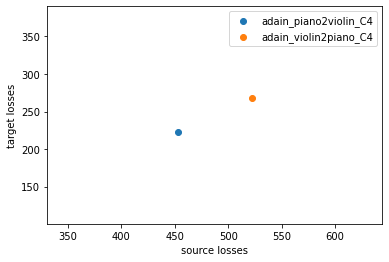

In [11]:
losses = loss_across_methods('piano-C4', 
                    'violin-C4', 
                    ['adain_piano2violin_C4', 'adain_violin2piano_C4'], 
                    arguments)
plot_losses(losses, arguments)